1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.


50
100
106
256


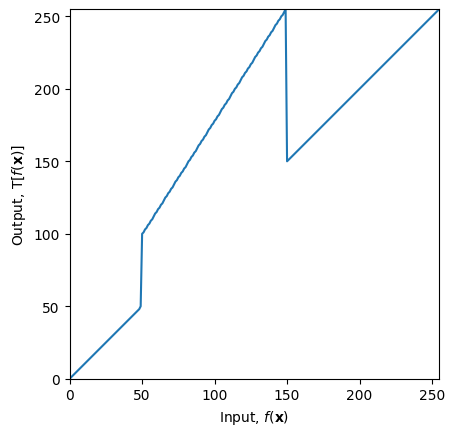

(810, 720, 3)


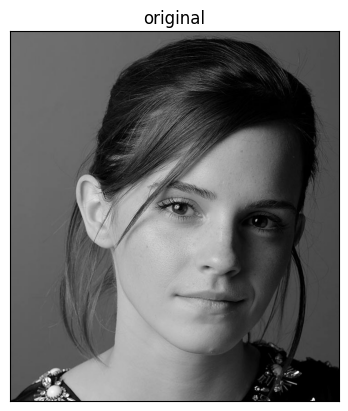

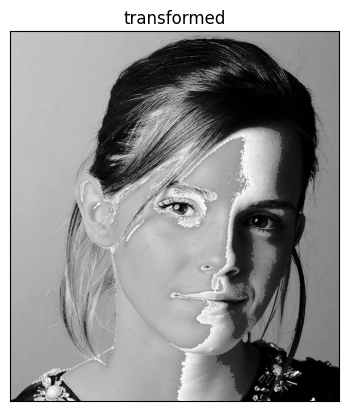

In [16]:
# Identity Transfrom

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0, 50, 50  - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(100, 255, 150 - 50).astype('uint8')
print(len(t2))
t3 = np.linspace(150 , 255, 256 - 150).astype('uint8')
print(len(t3)) 
  

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')

plt.show()

img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
img_orig=cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
#assert img_orig is not None
print(img_orig.shape)
plt.imshow(img_orig)
plt.title('original')
plt.xticks([]),plt.yticks([])
plt.show()

image_transformed = cv.LUT(img_orig, transform)

plt.imshow(image_transformed)
plt.title('transformed')
plt.xticks([]),plt.yticks([])
plt.show()


2. Apply a similar operation as above (question 1) to accentuate

(a) white matter

(b) gray matter

in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots

50
135
71

50
133
73

256
256


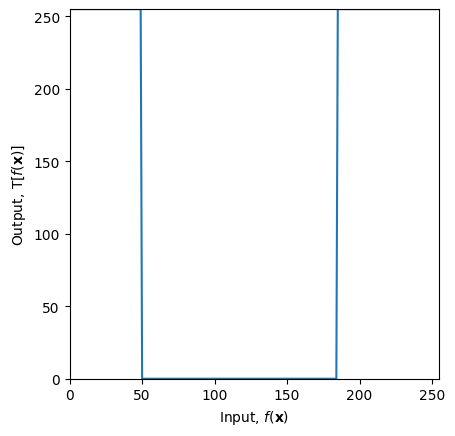

(217, 181, 3)


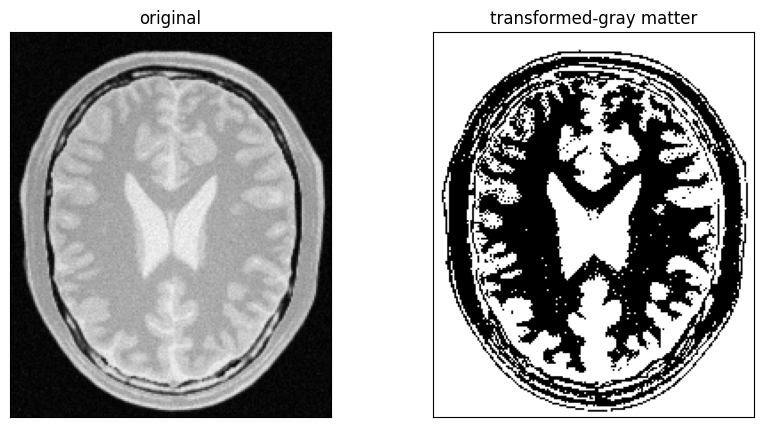

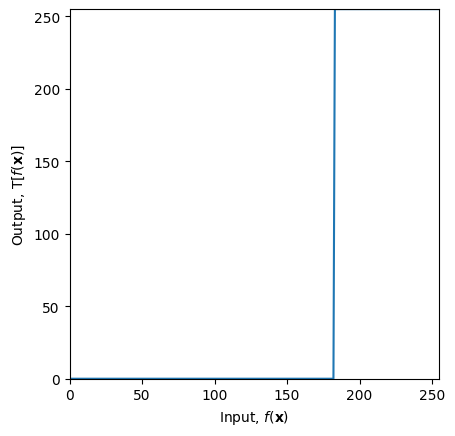

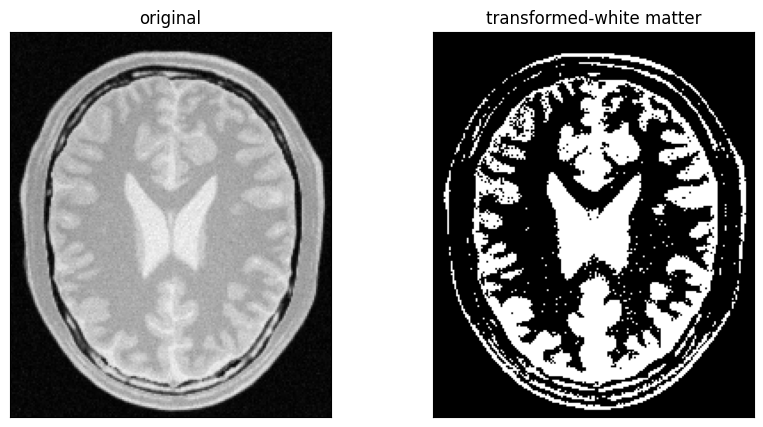

In [11]:
# Identity Transfrom

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#for gray filtering
t1 = np.linspace(255, 255, 50  - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(0, 0, 185 - 50).astype('uint8')
print(len(t2))
t3 = np.linspace(255 , 255, 256 - 185).astype('uint8')
print(len(t3)) 

print()

#for wite filtering
tt1 = np.linspace(0, 0, 50  - 0).astype('uint8')
print(len(tt1))
tt2 = np.linspace(0, 0, 183 - 50).astype('uint8')
print(len(tt2))
tt3 = np.linspace(255 , 255, 256 - 183).astype('uint8')
print(len(tt3))
print()

  

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

transform1 = np.concatenate((tt1, tt2), axis=0).astype('uint8')
transform1 = np.concatenate((transform1, tt3), axis=0).astype('uint8')
print(len(transform1))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()



img_orig1 = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
img_orig1=cv.cvtColor(img_orig1,cv.COLOR_BGR2RGB)
image_transformed = cv.LUT(img_orig1, transform)
#assert img_orig is not None
print(img_orig1.shape)
fig2,axx = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axx[0].imshow(img_orig1)
axx[0].set_title('original')
axx[0].set_xticks([]),axx[0].set_yticks([])
axx[1].imshow(image_transformed)
axx[1].set_title('transformed-gray matter')
axx[1].set_xticks([]),axx[1].set_yticks([])
plt.show()

fig, ax = plt.subplots()
ax.plot(transform1)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

image_transformed1 = cv.LUT(img_orig1, transform1)
fig2,axx = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axx[0].imshow(img_orig1)
axx[0].set_title('original')
axx[0].set_xticks([]),axx[0].set_yticks([])
axx[1].imshow(image_transformed1)
axx[1].set_title('transformed-white matter')
axx[1].set_xticks([]),axx[1].set_yticks([])
plt.show()



intensity 185 used as the threshold for the gray and white diffrence

------------------------------

3. Consider the image shown in Fig. 3
(a) Apply gamma correction to the L plane in the L color space and state the γ value.
(b) Show the histograms of the original and corrected images.

gamma =  2.15


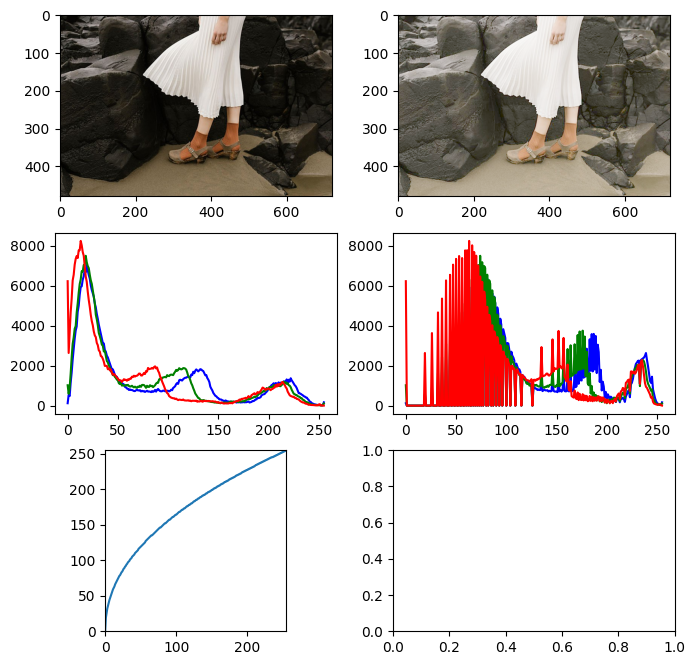

In [19]:
# Gamma and Histograms

%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)

gamma = 2.15
print('gamma = ', gamma)    
table = np.array([(i/255.0)**(1.0/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)

img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)

f, axarr = plt.subplots(3,2, figsize=(8,8))
axarr[0,0].imshow(img_orig)
axarr[0,1].imshow(img_gamma)

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)    
    
axarr[2,0].plot(table)
axarr[2,0].set_xlim(0,255)
axarr[2,0].set_ylim(0,255)
axarr[2,0].set_aspect('equal')

#axarr[2,1] is not needed, left as blank

gamma = 2.15

#### question 04

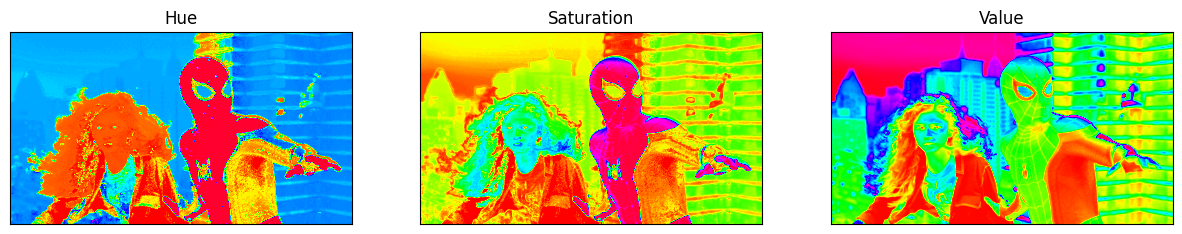

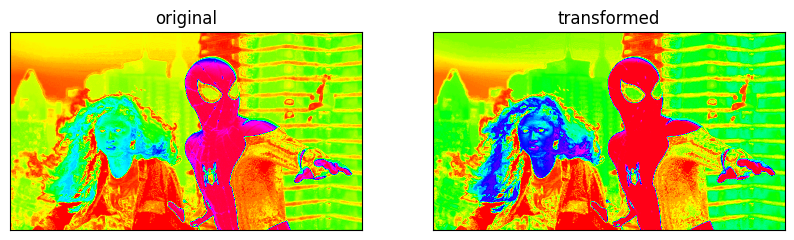

a =  0.8


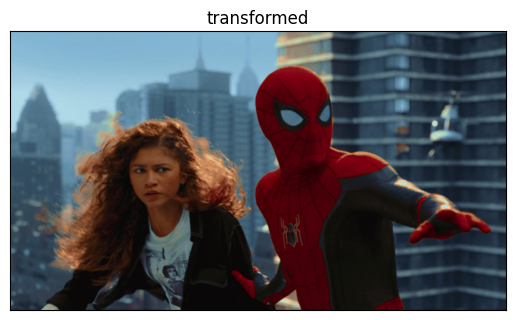

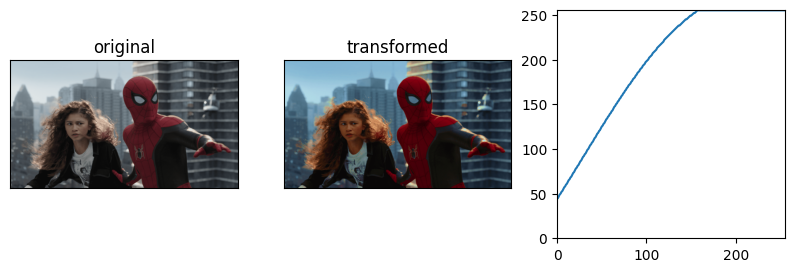

In [28]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = 'spider.png'
image = cv.imread(image_path)

# Convert the image to HSV color space
image1 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into individual planes
hue_plane = hsv_image[:, :, 0]
saturation_plane = hsv_image[:, :, 1]
value_plane = hsv_image[:, :, 2]

# Display the individual planes
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].imshow(hue_plane, cmap='hsv')
ax[0].set_title('Hue')
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[1].imshow(saturation_plane, cmap='hsv')
ax[1].set_title('Saturation')
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[2].imshow(value_plane, cmap='hsv')
ax[2].set_title('Value')
ax[2].set_xticks([]),ax[2].set_yticks([])
plt.show()

a=0.8
sig=70
# Generate the transformed values using a list comprehension
transform_values = [min(255, i + a * (128) * np.exp(-((i - 128) ** 2) / ((2 * sig )** 2))) for i in range(256)]

# Convert the list to a NumPy array
transform = np.array(transform_values).astype('uint8')
img_tr = cv.LUT(saturation_plane, transform)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].imshow(saturation_plane, cmap='hsv')
ax[0].set_title('original')
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[1].imshow(img_tr, cmap='hsv')
ax[1].set_title('transformed')
ax[1].set_xticks([]),ax[1].set_yticks([])
plt.show()
print('a = ', a)

murge = cv.merge((hue_plane, img_tr, value_plane))
murge = cv.cvtColor(murge, cv.COLOR_HSV2RGB)
plt.imshow(murge)
plt.title('transformed')
plt.xticks([]),plt.yticks([])
plt.show()
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
ax[0].imshow(image1)
ax[0].set_title('original')
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[1].imshow(murge)
ax[1].set_title('transformed')
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[2].plot(transform)
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal')

plt.show()


-------------------------------

Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the
histograms before and after equalization

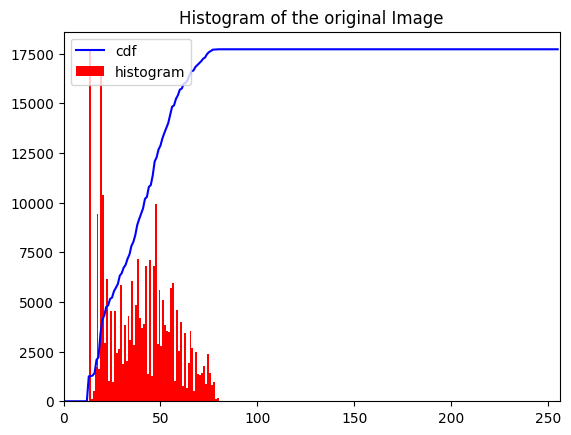

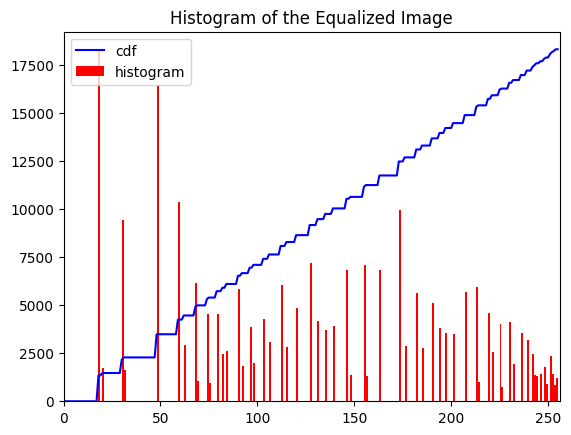

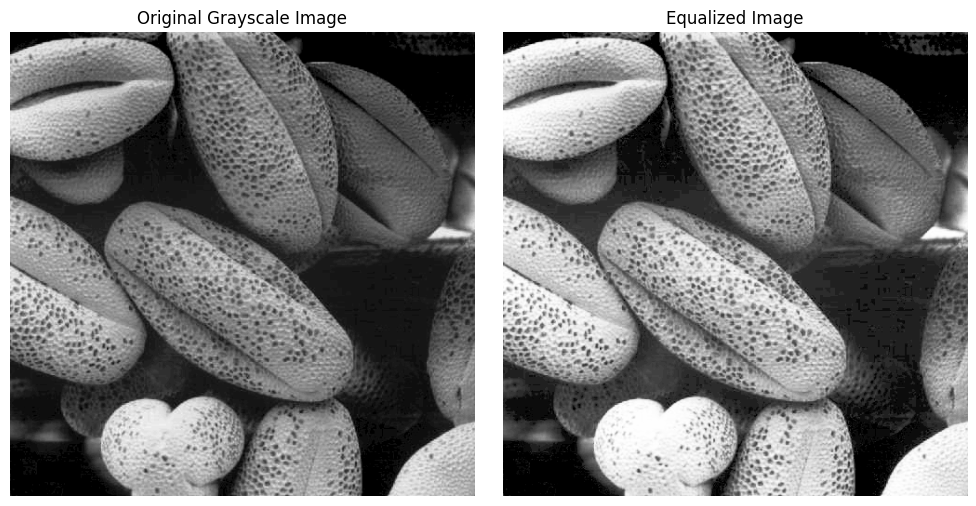

In [62]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def custom_histogram_equalization(image_gray):
    
    hist , bins = np.histogram(image_gray.ravel(),256,[0,256])
    M,N = image_gray.shape
    Transformation = (255*((hist.cumsum())/(M*N))).astype(np.uint8)
    equalized_image = Transformation[image_gray]
    
    # Compute histogram
    hist1, bins1 = np.histogram(equalized_image.flatten(), bins=256, range=[0,256])


    hist,bins = np.histogram(image_gray.ravel(),256,[0,256])
    cdf = hist.cumsum ()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(image_gray.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title('Histogram of the original Image')
    plt.show()

    hist,bins = np.histogram(equalized_image.ravel(),256,[0,256])
    cdf = hist.cumsum ()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(equalized_image.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title('Histogram of the Equalized Image')
    plt.show()

    
    return equalized_image.astype(np.uint8)

# Load an image
image_path = 'shells.tif'
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform custom histogram equalization
equalized_image = custom_histogram_equalization(image_gray)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()


------------------------------
In this question, we will apply histogram equalization only to the foreground of an image to produce an
image with a histogram equalized foreground

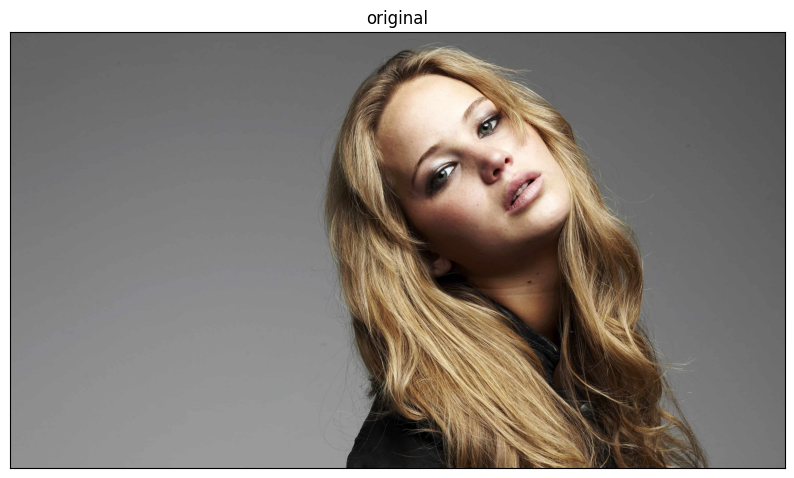

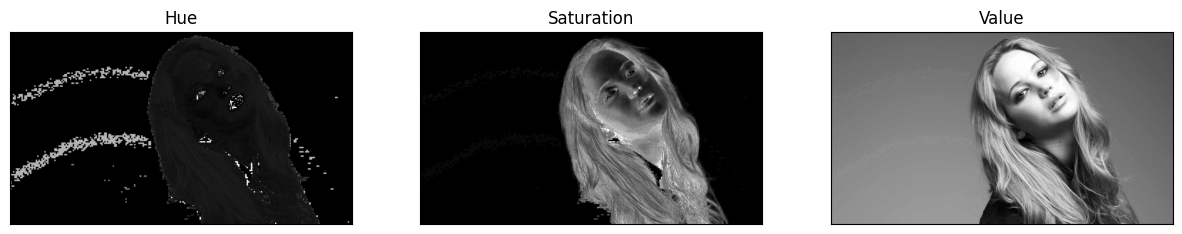

saturation plane suitable for create a mask



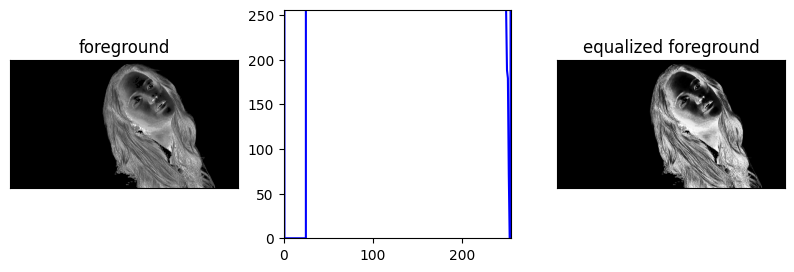

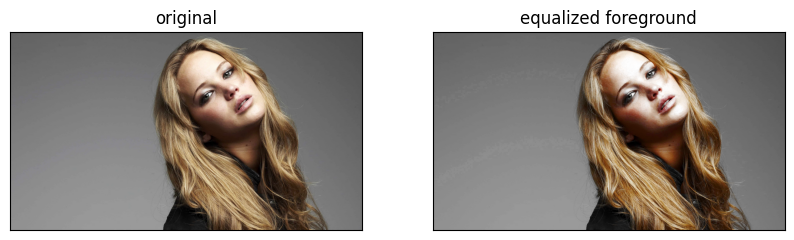

In [46]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = 'jeniffer.jpg'
image = cv.imread(image_path)

# Convert the image to HSV color space
image1 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image1)
plt.title('original')
plt.xticks([]),plt.yticks([])
plt.show()

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into individual planes
hue_plane = hsv_image[:, :, 0]
saturation_plane = hsv_image[:, :, 1]
value_plane = hsv_image[:, :, 2]

# Display the individual planes
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].imshow(hue_plane, cmap='gray')
ax[0].set_title('Hue')
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[1].imshow(saturation_plane, cmap='gray')
ax[1].set_title('Saturation')
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[2].imshow(value_plane, cmap='gray')
ax[2].set_title('Value')
ax[2].set_xticks([]),ax[2].set_yticks([])
plt.show()

print('saturation plane suitable for create a mask')
print()

threshold_value = 25
_, foreground_mask = cv.threshold(saturation_plane, threshold_value, 255, cv2.THRESH_BINARY)
# _ is used as a variable name to essentially "discard" or ignore a value that is returned by a function but is not intended to be used in the subsequent code.

# Apply bitwise_and to obtain the foreground
foreground = cv.bitwise_and(saturation_plane, saturation_plane, mask=foreground_mask)
# Compute the histogram of the foreground
hist_foreground, _ = np.histogram(foreground.flatten(), bins=256, range=[0, 256])
cum = hist_foreground.cumsum()
equ_foreground = cv.equalizeHist(foreground)
hist_equ_foreground, _ = np.histogram(equ_foreground.flatten(), bins=256, range=[0, 256])

fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
ax[0].imshow(foreground, cmap='gray')
ax[0].set_title('foreground')
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[1].plot(hist_foreground, color='b')
ax[1].set_xlim(0,255)
ax[1].set_ylim(0,255)
plt.title('histogram')
ax[1].set_aspect('equal')
ax[2].imshow(equ_foreground, cmap='gray')
ax[2].set_title('equalized foreground')
ax[2].set_xticks([]),ax[2].set_yticks([])
plt.show()
#ax[2].plot(hist_foreground.cumsum(), color='b')
#ax[2].set_xlim(0,255)
#ax[2].set_ylim(0,255)
#plt.title('cumulative histogram')
#ax[2].set_aspect('equal')
#plt.show()


#desplay the original image with the equalized foreground
murged = cv.merge((hue_plane, equ_foreground, value_plane))
murged = cv.cvtColor(murged, cv.COLOR_HSV2RGB)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].imshow(image1)
ax[0].set_title('original')
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[1].imshow(murged)
ax[1].set_title('equalized foreground')
ax[1].set_xticks([]),ax[1].set_yticks([])
plt.show()








----------------------
7. Filtering with the Sobel operator can compute the gradient

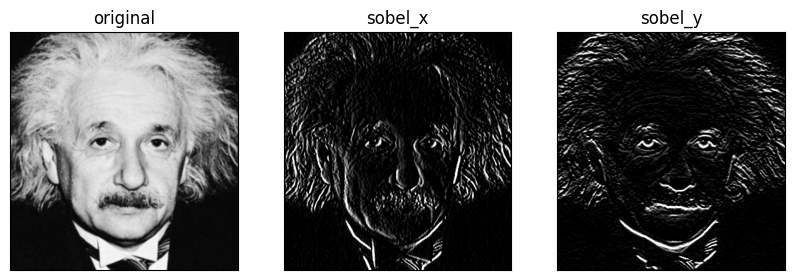

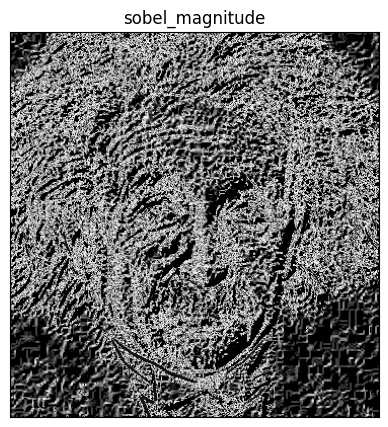

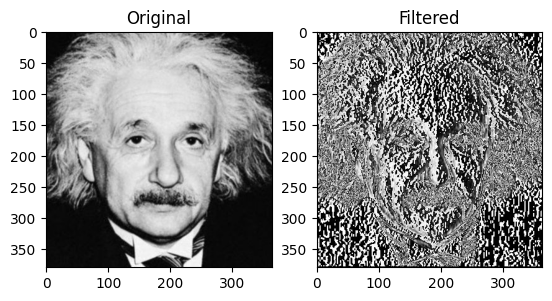

C:\Program Files\KMSpico\temp\ipykernel_5128\2520336299.py:83: RuntimeWarning: divide by zero encountered in divide
  kernel = kernel / np.sum(kernel)
C:\Program Files\KMSpico\temp\ipykernel_5128\2520336299.py:83: RuntimeWarning: invalid value encountered in divide
  kernel = kernel / np.sum(kernel)
C:\Program Files\KMSpico\temp\ipykernel_5128\2520336299.py:100: RuntimeWarning: invalid value encountered in multiply
  result[m, n] = np.sum(region * kernel)
C:\Program Files\KMSpico\temp\ipykernel_5128\2520336299.py:112: RuntimeWarning: invalid value encountered in cast
  filtered_image = (filtered_image * 255.0).clip(0, 255).astype(np.uint8)


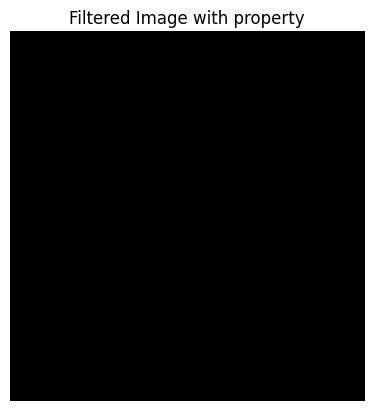

In [53]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load an image
image_path = 'einstein.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create Sobel kernels for horizontal and vertical edges
sobel_kernel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_kernel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

# Apply the Sobel filter using filter2D
sobel_x = cv2.filter2D(image, -1, sobel_kernel_x)
sobel_y = cv2.filter2D(image, -1, sobel_kernel_y)

# Optionally, combine the results to get the magnitude of the gradient
sobel_magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

#desplay the image (original and filtered)
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('original')
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[1].imshow(sobel_x, cmap='gray')
ax[1].set_title('sobel_x')
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[2].imshow(sobel_y, cmap='gray')
ax[2].set_title('sobel_y')
ax[2].set_xticks([]),ax[2].set_yticks([])
plt.show()

fig1,axx = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
axx.imshow(sobel_magnitude, cmap='gray')
axx.set_title('sobel_magnitude')
axx.set_xticks([]),axx.set_yticks([])
plt.show()

#using custom function
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
    k_hh, k_hw = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')
    
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):            
            result[m,n] = np.dot(image_float[m-k_hh:m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten(), kernel.flatten())         
    return result
    

f, axarr = plt.subplots(1,2)
axarr[0].imshow(image, cmap="gray")
axarr[0].set_title('Original')
kernel = np.array([(1, 0, -1), (2, 0, -2), (1, 0, -1)], dtype='float')
imgb = filter(image, kernel)
imgb = imgb*255.0
imgb = imgb.astype(np.uint8)

axarr[1].imshow(imgb, cmap="gray")
axarr[1].set_title('Filtered')
cv.imwrite('keira_filtered.png', imgb)
plt.show()


# Using the property


def generate_kernel(matrix_A, matrix_B):
    kernel = np.dot(matrix_A, matrix_B)
    kernel = kernel / np.sum(kernel)
    return kernel

def filter_with_kernel(image, kernel):
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')

    k_hh, k_hw = divmod(kernel.shape[0], 2), divmod(kernel.shape[1], 2)
    
    # Pad the image with border reflections
    image_padded = cv.copyMakeBorder(image_float, k_hh[0], k_hh[0], k_hw[0], k_hw[1], cv.BORDER_REFLECT)
    
    # Perform convolution using vectorized operations
    for m in range(k_hh[0], h - k_hh[0]):
        for n in range(k_hw[0], w - k_hw[0]):
            region = image_padded[m - k_hh[0]:m + k_hh[0] + 1, n - k_hw[0]:n + k_hw[0] + 1]
            result[m, n] = np.sum(region * kernel)

    return result

# Define the matrices A and B
matrix_A = np.array([[1], [2], [1]])
matrix_B = np.array([[1, 0, -1]])
kernel_def = generate_kernel(matrix_A, matrix_B)

filtered_image = filter_with_kernel(image, kernel_def)

# Normalize the output to the range [0, 255] for proper display
filtered_image = (filtered_image * 255.0).clip(0, 255).astype(np.uint8)

# Display the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image with property')
plt.axis('off')
plt.show()



---------------------------------------------
8. Write a program to zoom images by a given factor s ∈ (0,10]. You must use a function to zoom the image,
which can handle

        (a) nearest-neighbor, and
        
        (b) bilinear interpolation.

SSD between original and scaled image using nearest neighbor:  17.171342909907853
SSD between original and scaled image using bilinear interpolation:  22.376757387099232


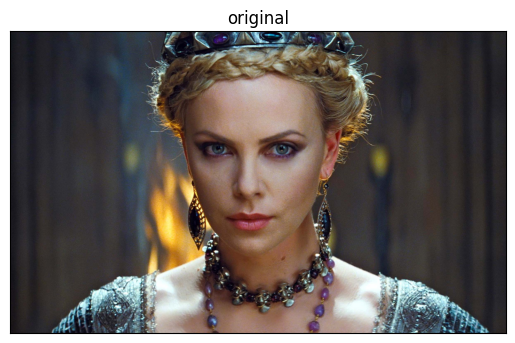


SSD between original and scaled image using nearest neighbor:  11.902013310185184
SSD between original and scaled image using bilinear interpolation:  16.21177662037037


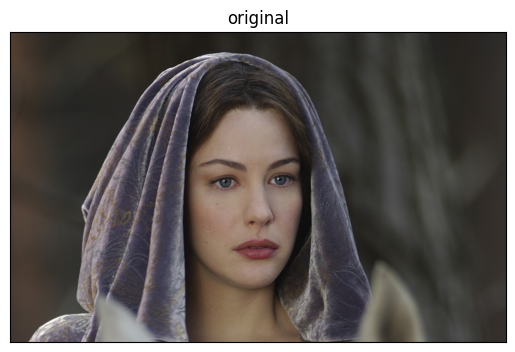

In [84]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def resize_image_nearest_neighbor(image, n):
    old_height, old_width, _ = image.shape

    # Calculate the new dimensions
    new_height = old_height * n
    new_width = old_width * n

    # Create a new empty image with the desired dimensions
    new_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            x = int(j / n)
            y = int(i / n)
            new_image[i, j, :] = image[y, x, :]

    return new_image

def resize_bilinear(image, n):
    
    old_height, old_width, _ = image.shape
    # Calculate the new dimensions
    new_height = int(old_height * n)
    new_width = int(old_width * n)

    # Create a new empty image with the desired dimensions
    new_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            # Calculate the corresponding coordinates in the original image
            x = j / n
            y = i / n

            # Calculate the four nearest neighbors
            x1, y1 = int(np.floor(x)), int(np.floor(y))
            x2, y2 = min(x1 + 1, old_width - 1), min(y1 + 1, old_height - 1)

            # Bilinear interpolation
            dx = x - x1
            dy = y - y1
            top_left = image[y1, x1]
            top_right = image[y1, x2]
            bottom_left = image[y2, x1]
            bottom_right = image[y2, x2]

            new_pixel = (1 - dx) * (1 - dy) * top_left + dx * (1 - dy) * top_right + \
                        (1 - dx) * dy * bottom_left + dx * dy * bottom_right

            new_image[i, j, :] = new_pixel.astype(np.uint8)

    return new_image

def normalized_ssd(image1, image2):
        
    assert image1.shape[-1] == image2.shape[-1], "Both images should have the same number of color channels"

    # Get the dimensions of both images
    h1, w1 = image1.shape[:2]
    h2, w2 = image2.shape[:2]

    # Determine the size of the overlapping region
    h_overlap = min(h1, h2)
    w_overlap = min(w1, w2)
    image1_cropped = image1[:h_overlap, :w_overlap]
    image2_cropped = image2[:h_overlap, :w_overlap]
    # Calculate the sum of squared differences
    ssd = np.sum((image1_cropped - image2_cropped) ** 2)
    normalized_ssd = ssd / (h_overlap * w_overlap * image1.shape[-1]) 
    return normalized_ssd

org_small_1 = cv.imread('im03small.png')
scaled_nn_1 = resize_image_nearest_neighbor(org_small_1, 4)
scaled_bl_1 = resize_bilinear(org_small_1, 4)
original_1 = cv.imread('im03.png')
print('SSD between original and scaled image using nearest neighbor: ', normalized_ssd(original_1, scaled_nn_1))
print('SSD between original and scaled image using bilinear interpolation: ', normalized_ssd(original_1, scaled_bl_1))
org = cv.cvtColor(original_1, cv.COLOR_BGR2RGB)
plt.imshow(org)
plt.title('original')
plt.xticks([]), plt.yticks([])
plt.show()

print()

org_small_2 = cv.imread('im02small.png')
scaled_nn_2 = resize_image_nearest_neighbor(org_small_2, 4)
scaled_bl_2 = resize_bilinear(org_small_2, 4)
original_2 = cv.imread('im02.png')
print('SSD between original and scaled image using nearest neighbor: ', normalized_ssd(original_2, scaled_nn_2))
print('SSD between original and scaled image using bilinear interpolation: ', normalized_ssd(original_2, scaled_bl_2))
org = cv.cvtColor(original_2, cv.COLOR_BGR2RGB)
plt.imshow(org)
plt.title('original')
plt.xticks([]), plt.yticks([])
plt.show()

# cv.imshow('original', org1)
# cv.imshow('zoomed', resize_bilinear(org1, 2))
# cv.waitKey(0)
# cv.destroyAllWindows()

9.shows a flower image with both the foreground and background are in focus.

    (a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and
        background image.

    (b) Produce an enhanced image with a substantially blurred background. Display the original image
        alongside the enhanced image.
        
    (c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?


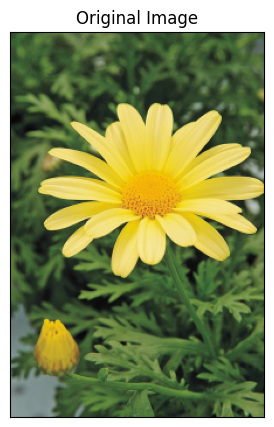

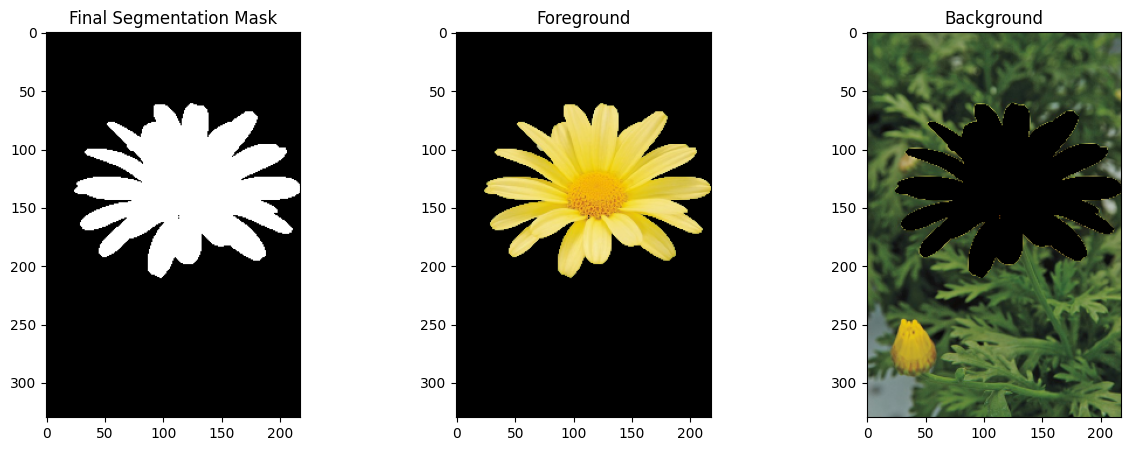

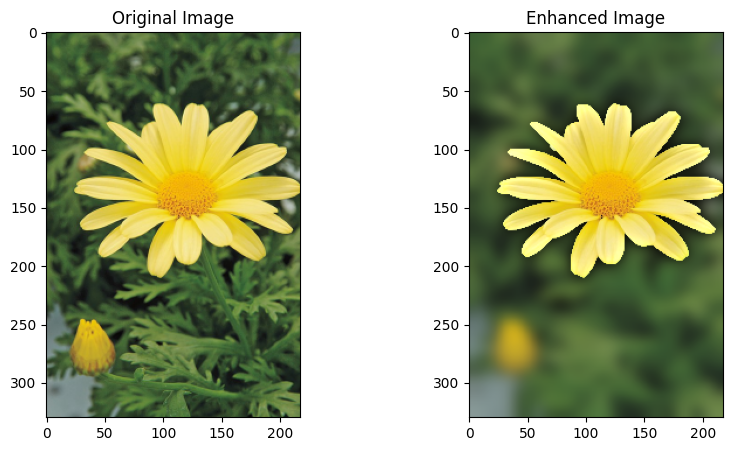

In [122]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = 'flower.png'
image = cv.imread(image_path)

# Convert the image to RGB color space
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Display the original image
fig = plt.figure(figsize=(5, 5))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.show()

# Define the rectangle for initial object approximation (x, y, width, height)
initial_rect = (10, 50, 420, 220)

# Initialize the mask, background model, and foreground model
mask = np.zeros(image.shape[:2], dtype="uint8")
background_model = np.zeros((1, 65), dtype="float")
foreground_model = np.zeros((1, 65), dtype="float")

# Apply GrabCut with rectangle initialization
(cv_mask, background_model, foreground_model) = cv.grabCut(
    image, mask, initial_rect, background_model, foreground_model, 18, cv.GC_INIT_WITH_RECT
)

# Create a binary mask from the GrabCut result
segmentation_mask = np.where((cv_mask == 2) | (cv_mask == 0), 0, 1).astype('uint8')

# Run GrabCut with mask initialization
cv.grabCut(image, segmentation_mask, None, background_model, foreground_model, 18, cv.GC_INIT_WITH_MASK)

# Create foreground and background images based on the final mask
foreground_image = cv.bitwise_and(image, image, mask=segmentation_mask)
background_image = image - foreground_image

# Display the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].set_title('Final Segmentation Mask')
ax[0].imshow(segmentation_mask, cmap='gray')
ax[1].set_title('Foreground')
ax[1].imshow(cv.cvtColor(foreground_image, cv.COLOR_BGR2RGB))
ax[2].set_title('Background')
ax[2].imshow(cv.cvtColor(background_image, cv.COLOR_BGR2RGB))
plt.show()

blurred_bg = cv.GaussianBlur(background_image, (0, 0), 6)
enhanced_image = cv.add(foreground_image, blurred_bg)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('Original Image')
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[1].set_title('Enhanced Image')
ax[1].imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.show()



-----------------------

In the enhanced image generated using GrabCut, the darkening of the background just beyond the edge of the flower is a result of the algorithm's attempt to separate the foreground (the flower) from the background. GrabCut tries to iteratively classify pixels as either foreground or background based on the initial seed region (defined by the rectangle) and the user-provided mask.

Initialization: GrabCut starts with an initial approximation of the foreground and background based on the provided rectangle. Pixels inside the rectangle are considered the foreground, and those outside are considered the background.

Iteration: GrabCut iteratively refines its estimate of the foreground and background by assigning labels to pixels based on their color and proximity to the initial seed region. It adjusts its model parameters (background and foreground models) to fit the data better.

Propagation of Labels: During the iterations, pixels near the boundary between the foreground and background may get assigned to the wrong class (either foreground or background) due to their similarity to nearby pixels. GrabCut doesn't have a strong prior that prevents it from making such errors.

Edge Pixels: Pixels just beyond the edge of the flower may be considered background by the algorithm because they are closer to the initially defined background region and share some similarity in color with the background pixels.

Mask Propagation: When GrabCut is run with the mask initialization, the algorithm refines the labels based on the initial mask. However, if the initial mask is imprecise or doesn't perfectly match the object's boundary, it can lead to errors near the boundary.

----------------------



1. `mask = np.zeros(image.shape[:2], np.uint8)`: This line creates an empty mask of the same size as the input image. The mask will be used to mark pixels as either foreground, background, or possible foreground/background during the GrabCut segmentation.

2. `rect = (50, 50, 400, 300)`: Here, we define a rectangle (`rect`) that represents the initial region of interest (ROI) for the foreground object within the image. The format of the rectangle is `(x, y, width, height)`. In this example, the rectangle is defined as starting at coordinates `(50, 50)` with a width of `400` pixels and a height of `300` pixels. This initial rectangle helps the GrabCut algorithm segment the image.

3. `bgdModel = np.zeros((1, 65), np.float64)` and `fgdModel = np.zeros((1, 65), np.float64)`: These lines initialize two models, `bgdModel` (background model) and `fgdModel` (foreground model), as arrays of zeros. These models are used by the GrabCut algorithm to iteratively update the pixel labels as either background or foreground during the algorithm's execution.

4. `cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)`: This line runs the GrabCut algorithm on the input `image`. It takes several parameters:
   - `image`: The input image to be segmented.
   - `mask`: The empty mask created earlier.
   - `rect`: The initial rectangle defining the foreground object's location.
   - `bgdModel` and `fgdModel`: The background and foreground models, respectively.
   - `5`: The number of iterations for the GrabCut algorithm.
   - `cv2.GC_INIT_WITH_RECT`: This flag indicates that we are initializing the segmentation with the provided rectangle.

5. `foreground_mask` and `background_mask`: After running GrabCut, these lines create binary masks that identify pixels classified as foreground or background. Pixels marked as `2` or `3` in the GrabCut output mask are considered foreground, and pixels marked as `0` or `1` are considered background. The `np.where` function is used to convert these values to binary values `255` (white) for foreground and `0` (black) for background.

6. `foreground_image` and `background_image`: These lines apply the foreground and background masks to the original image using `cv2.bitwise_and`. This results in two separate images:
   - `foreground_image` contains the foreground object extracted from the original image.
   - `background_image` contains the background from the original image.

These steps allow you to perform foreground-background segmentation using GrabCut and create masks and images that separate the foreground and background components of the input image.